# Bibliotecas

In [338]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas as gpd


## Entendimento e Visualização das Bases

## Dados Geográficos

In [339]:
mapa = gpd.read_file("bases_mapa/PE_Municipios_2023.shp")
mapa.head(1)

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
0,2600054,Abreu e Lima,260001,Recife,2601,Recife,26,Pernambuco,2,Nordeste,2611606,Recife/PE,126.384,"POLYGON ((-34.9148 -7.9276, -34.91576 -7.92712..."


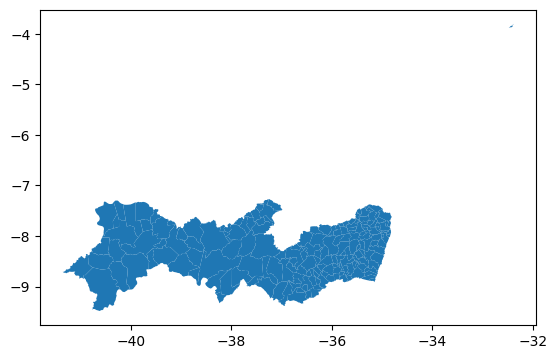

In [340]:
mapa.plot()
plt.show()

## Censo Alfabetização

In [341]:
alfabetização_censo = pd.read_csv('alfabetizacaope.csv')
alfabetização_censo.head(3)

,NM_MUN,Total,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Indígena.2,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180
0,NaN,Total,15 a 19 anos,20 a 24 anos,25 a 34 anos,35 a 44 anos,45 a 54 anos,55 a 64 anos,65 anos ou mais,75 anos ou mais,...,Total,15 a 19 anos,20 a 24 anos,25 a 34 anos,35 a 44 anos,45 a 54 anos,55 a 64 anos,65 anos ou mais,75 anos ou mais,80 anos ou mais
1,Pernambuco,"86,59","97,6","97,3","95,9","90,79","83,18","75,72","64,83","58,74",...,"84,63","97,68","97,91","96,16","89,69","80,83","69,56","52,13","43,52","40,54"
2,Abreu e Lima,"91,45","98,02","97,92","97,54","95,4","91,25","85,25","74,05","64,39",...,"88,12",100,100,"94,44",100,80,"89,47","64,29",75,-


In [342]:
alfabetizacao_cd = pd.merge(
    alfabetização_censo, 
    mapa[['NM_MUN', 'CD_MUN']], 
    on='NM_MUN', 
    how='left'  
)
alfabetizacao_cd.head(6)

,NM_MUN,Total,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,CD_MUN
0,NaN,Total,15 a 19 anos,20 a 24 anos,25 a 34 anos,35 a 44 anos,45 a 54 anos,55 a 64 anos,65 anos ou mais,75 anos ou mais,...,15 a 19 anos,20 a 24 anos,25 a 34 anos,35 a 44 anos,45 a 54 anos,55 a 64 anos,65 anos ou mais,75 anos ou mais,80 anos ou mais,NaN
1,Pernambuco,"86,59","97,6","97,3","95,9","90,79","83,18","75,72","64,83","58,74",...,"97,68","97,91","96,16","89,69","80,83","69,56","52,13","43,52","40,54",NaN
2,Abreu e Lima,"91,45","98,02","97,92","97,54","95,4","91,25","85,25","74,05","64,39",...,100,100,"94,44",100,80,"89,47","64,29",75,-,2600054
3,Afogados da Ingazeira,"84,89","98,41","98,07","96,54","91,75","82,06","70,21","57,41","51,61",...,100,100,100,100,100,"83,33","66,67",-,-,2600104
4,Afrânio,"81,88","97,23","98,09","97,13","87,52",77,"64,73","46,63","38,47",...,-,100,-,100,-,-,-,-,-,2600203
5,Agrestina,"76,74","96,84","95,53","93,93","81,76","70,43","56,51","40,57","32,87",...,100,100,100,"66,67",75,-,50,-,-,2600302


In [88]:
alfabetizacao_cd = alfabetizacao_cd[['NM_MUN', 'Total']]
alfabetizacao_cd.dropna(subset=['NM_MUN'], inplace=True)
alfabetizacao_cd.head(4)

,NM_MUN,Total
1,Pernambuco,"86,59"
2,Abreu e Lima,"91,45"
3,Afogados da Ingazeira,"84,89"
4,Afrânio,"81,88"


## Resultados da Eleição em Pernambuco de 2022

In [344]:
import csv

votos = pd.read_csv('votacao.csv', quoting=csv.QUOTE_NONE, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')
votos.head()

,"""DT_GERACAO""","""HH_GERACAO""","""ANO_ELEICAO""","""CD_TIPO_ELEICAO""","""NM_TIPO_ELEICAO""","""NR_TURNO""","""CD_ELEICAO""","""DS_ELEICAO""","""DT_ELEICAO""","""TP_ABRANGENCIA""",...,"""NR_SECAO""","""CD_CARGO""","""DS_CARGO""","""NR_VOTAVEL""","""NM_VOTAVEL""","""QT_VOTOS""","""NR_LOCAL_VOTACAO""","""SQ_CANDIDATO""","""NM_LOCAL_VOTACAO""","""DS_LOCAL_VOTACAO_ENDERECO"""
0,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""336""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""2""","""1457""","""170001610736""","""ESCOLA MUNICIPAL NATIVIDADE SALDANHA""","""RUA DO FUTURO, S/N"""
1,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""152""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1112""","""170001610736""","""ESCOLA DE REFERÊNCIA EM ENSINO MÉDIO PROF. AN...","""RUA QUINTINO BOCAIUVA, SN"""
2,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""25""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1066""","""170001610736""","""ESCOLA ESTADUAL JOÃO PESSOA GUERRA""","""RUA ALFREDO BANDEIRA DE MELO, S/N"""
3,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""281""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1759""","""170001610736""","""COLÉGIO TRIUNFO""","""R. DO TRIUNFO, 647"""
4,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""96""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1171""","""170001610736""","""COLÉGIO SALESIANO""","""AV. PADRE ROCHA, 500"""


In [345]:
votos_deputado = votos.loc[votos['"DS_CARGO"']=='"DEPUTADO FEDERAL"']
print(f"No total, a base possui {len(votos)} votos, sendo {len(votos_deputado)} para Deputado Federal.")

No total, a base possui 2763316 votos, sendo 1129687 para Deputado Federal.


In [346]:
del votos
gc.collect()

9093

In [347]:
to_drop = ['"ANO_ELEICAO"', '"CD_TIPO_ELEICAO"', '"NM_TIPO_ELEICAO"', '"NR_TURNO"', '"CD_ELEICAO"',
'"DS_ELEICAO"','"DT_ELEICAO"', '"TP_ABRANGENCIA"', '"SG_UF"', '"SG_UE"', '"NM_UE"',
'"CD_CARGO"', '"DS_CARGO"', '"DT_GERACAO"']

votos_deputado = votos_deputado.drop(columns=(to_drop))

for col in votos_deputado.columns:
    if votos_deputado[col].dtype == 'object':
        votos_deputado[col] = votos_deputado[col].str.replace('"', '', regex=False)

votos_deputado.columns = votos_deputado.columns.str.replace('"', '', regex=False)

votos_deputado['QT_VOTOS'] = votos_deputado['QT_VOTOS'].astype(int)

votos_deputado.columns

Index(['HH_GERACAO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

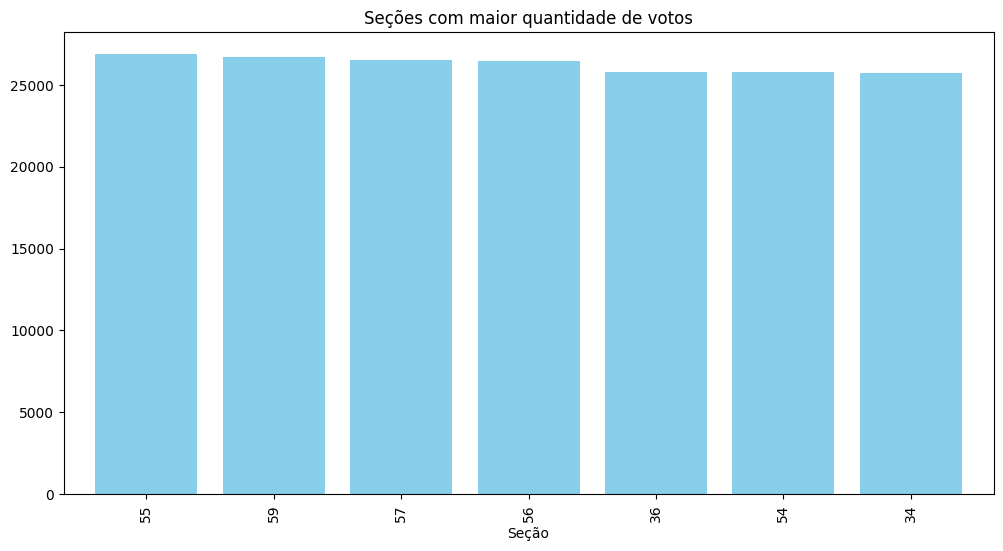

In [348]:
votos_secao = votos_deputado.groupby('NR_SECAO')['QT_VOTOS'].sum().sort_values(ascending=False)
maisvotos = votos_secao.head(7)
plt.figure(figsize=(12,6))
maisvotos.plot(kind='bar', width=0.8, color='skyblue')
plt.title("Seções com maior quantidade de votos")
plt.xlabel("Seção")
plt.show()

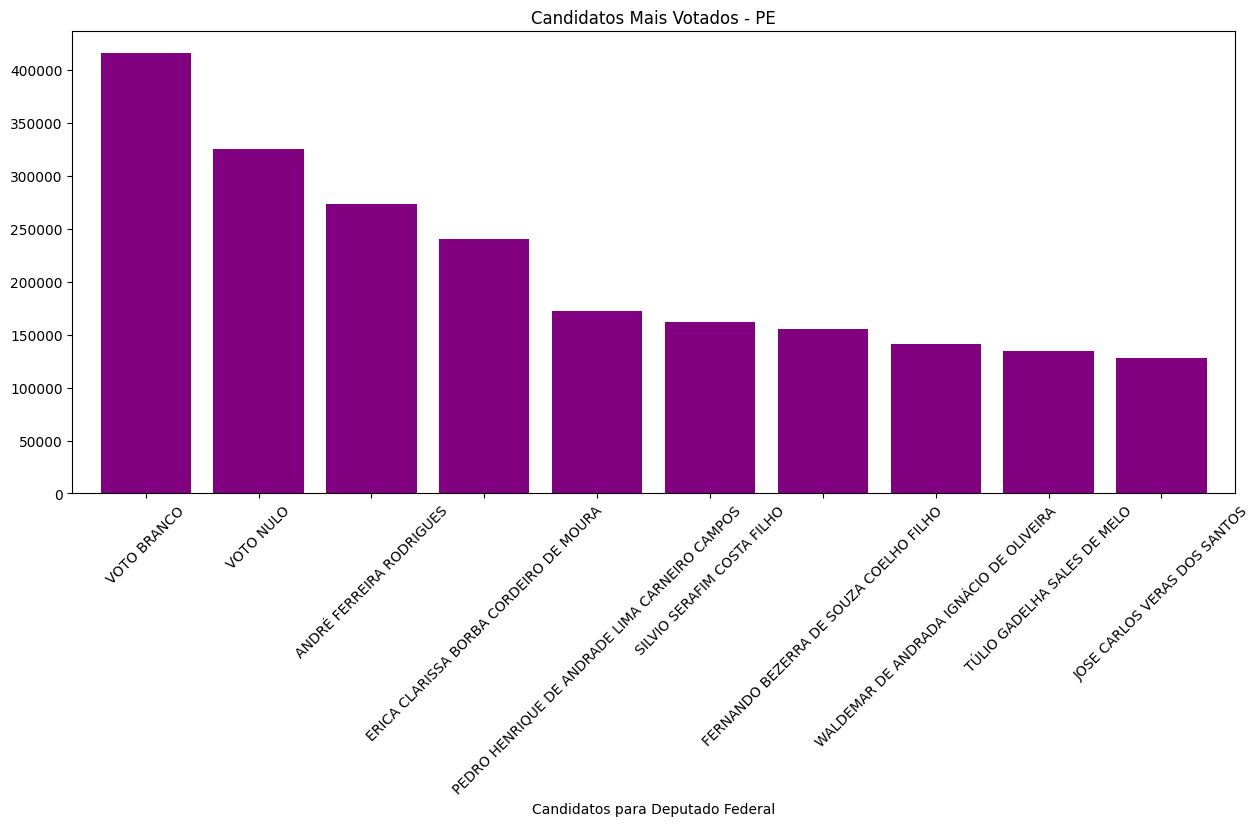

In [349]:
votos_candidatos = votos_deputado.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending=False)
candidatos_mais_votados = votos_candidatos.head(10)

plt.figure(figsize=(15,6))
candidatos_mais_votados.plot(kind='bar', width=0.8, color='purple')
plt.title('Candidatos Mais Votados - PE')
plt.xlabel("Candidatos para Deputado Federal")
plt.xticks(rotation=45)
plt.show()

In [350]:
votos_deputado.isna().sum()

HH_GERACAO                   0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
NR_ZONA                      0
NR_SECAO                     0
NR_VOTAVEL                   0
NM_VOTAVEL                   0
QT_VOTOS                     0
NR_LOCAL_VOTACAO             0
SQ_CANDIDATO                 0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64

## Deputados 


In [351]:
deputados = gpd.read_file("deputados_pe.csv")
deputados.head(1)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,11/01/2025,03:36:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-4,NÃO DIVULGÁVEL,-1,#NULO#


In [352]:
deputados.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'DS_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'SG_UF_NASCIMENTO', 'DT_NASCIMENTO', 'NR_TITULO_ELEITORAL_CANDIDATO',
       'CD_GENERO', 'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA',
       'CD_OCUPACAO', 'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [353]:
deputados_partidos = deputados[["NR_CANDIDATO" , "NM_CANDIDATO", "NR_PARTIDO", "SG_PARTIDO", "CD_SIT_TOT_TURNO"]]
deputados_partidos = deputados_partidos.rename(columns={"CD_SIT_TOT_TURNO" : "RESULTADO"})
deputados_partidos.head(10)

# Índice RESULTADO:
# -1: Nulo   1: Eleito   2: Eleito por QP   3: Eleito por Média   4: Não eleito   5: Suplente

,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,RESULTADO
0,14300,GERCINALDO DO NASCIMENTO BARBOZA,14,PTB,-1
1,22010,ABIMAEL DOS SANTOS PEREIRA,22,PL,2
2,7080,GILMAR PEREIRA DA SILVA,70,AVANTE,5
3,4499,DEBORAH IMINY BERNARDINO CARVALHO DAMASCENO,44,UNIÃO,5
4,77613,LEONARDO JOSÉ MARINHO DAMASCENO,77,SOLIDARIEDADE,-1
5,22337,MAURÍCIO RIBEIRO DA LUZ,22,PL,5
6,22777,CARLOS ANDREY DE SOUZA FERREIRA,22,PL,5
7,27888,SAMUEL FRANCISCO DA SILVA,27,DC,4
8,7007,MARCELO DA MOTTA SILVEIRA,70,AVANTE,5
9,1136,LUIZ EDUARDO DE OLIVEIRA,11,PP,5


## Instituições de Ensino 


In [354]:
instituicoes = pd.read_csv('instituicoesSuperior.csv')
instituicoes.head()

,Código Mantenedora,Razão Social,CNPJ,Natureza Jurídica,Código IES,Instituição(IES),Sigla,Telefone,Sitio,e-Mail,...,CI,Ano CI,CI-EaD,Ano CI-EaD,IGC,Ano IGC,Reitor/Dirigente Principal,Representante Legal,Sinalizações Vigentes,Situação da IES
0,1336,ITPAC INSTITUTO TOCANTINENSE PRESIDENTE ANTONI...,02.941.990/0001-98,Privada com fins lucrativos,5580,Afya Faculdade de Ciências Médicas de Garanhun...,AFYA GARANHUNS,(81) 4040-4242,https://www.fameg.com.br/,adriene.jacinto@afya.com.br; gabriele.duraes@a...,...,4,2023.0,-,NaN,-,NaN,NaN,NaN,NaN,Ativa
1,759,SOCIEDADE EDUCACIONAL E CULTURAL SERGIPE DEL R...,32.728.800/0001-10,Privada com fins lucrativos,22514,Afya Faculdade de Ciências Médicas de Jaboatão...,AFYA JABOATÃO,(81) 996689915,https://jaboatao.afya.com.br/,vanessa.piasson@afya.com.br,...,5,2022.0,-,NaN,-,NaN,NaN,NaN,NaN,Ativa
2,57,AUTARQUIA DE ENSINO SUPERIOR DE ARCOVERDE,11.462.454/0001-09,Pessoa Jurídica de Direito Público - Municipal,73,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),CESA,(87)3821-0644 / (87)9927-4392,www.aesa-cesa.br,direcaocesa@hotmail.com,...,-,NaN,-,NaN,2,2022.0,NaN,NaN,NaN,Ativa
3,446,AUTARQUIA BELEMITA DE CULTURA DESPORTOS E EDUC...,10.264.877/0001-43,Pessoa Jurídica de Direito Público - Municipal,674,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISC...,CESVASF,(87)38761248,www.cesvasf.com.br,secretaria@cesvasf.com.br,...,-,NaN,-,NaN,3,2022.0,NaN,NaN,NaN,Ativa
4,276,AESO-ENSINO SUPERIOR DE OLINDA LTDA,09.726.365/0001-72,Privada com fins lucrativos,4420,Centro Universitário Aeso - Barros Melo (Uniaeso),Uniaeso,(81) 2128 9797,www.barrosmelo.edu.br,aeso@aeso.br,...,5,2019.0,5,2019.0,3,2022.0,NaN,NaN,NaN,Ativa


In [355]:
instituicoesLimpo = instituicoes[["Instituição(IES)", "Endereço Sede", "Município"]]
instituicoesLimpo.head()

,Instituição(IES),Endereço Sede,Município
0,Afya Faculdade de Ciências Médicas de Garanhun...,Avenida General Costa e Silva - 06 - CEP: 5529...,Garanhuns
1,Afya Faculdade de Ciências Médicas de Jaboatão...,Avenida General Barreto de Menezes - 738 - CEP...,Jaboatão dos Guararapes
2,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),Rua Gumercindo Cavalcanti - 420 - CEP: 56512-9...,Arcoverde
3,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISC...,BR 316 - Campus Alto do Encanto - s/n - CEP: 5...,Belém do São Francisco
4,Centro Universitário Aeso - Barros Melo (Uniaeso),Avenida Transamazônica - 405 - CEP: 53300-240 ...,Olinda


In [356]:
instituicoesLimpo.describe()

,Instituição(IES),Endereço Sede,Município
count,137,137,137
unique,137,132,31
top,Afya Faculdade de Ciências Médicas de Garanhun...,Rua Dom Bosco - 551 - CEP: 50070-070 - Boa Vista,Recife
freq,1,3,45


In [357]:
instituicoesLimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Instituição(IES)  137 non-null    object
 1   Endereço Sede     137 non-null    object
 2   Município         137 non-null    object
dtypes: object(3)
memory usage: 3.3+ KB


In [358]:
instituicoesLimpo.isna().sum()

Instituição(IES)    0
Endereço Sede       0
Município           0
dtype: int64

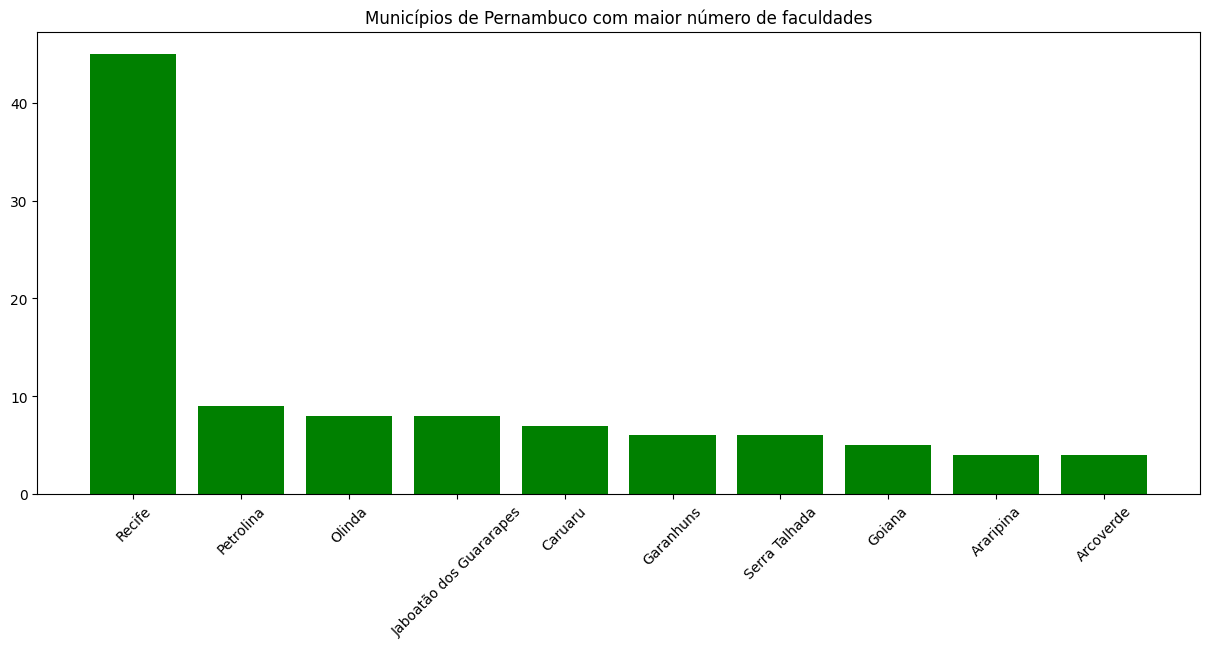

In [359]:
municipios = instituicoesLimpo['Município'].value_counts(ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.bar(municipios.index, municipios.values, color='green')
plt.title('Municípios de Pernambuco com maior número de faculdades')
plt.xticks(rotation=45)
plt.show()

# Engenharia de Dados

### Dados TSE

In [360]:
votos_deputado.columns

Index(['HH_GERACAO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [361]:
votos_deputado['NM_VOTAVEL'].nunique()

466

In [362]:
votos_candidatos.head(5)

NM_VOTAVEL
VOTO BRANCO                                       415524
VOTO NULO                                         324967
ANDRÉ FERREIRA RODRIGUES                          273267
ERICA CLARISSA BORBA CORDEIRO DE MOURA            240511
PEDRO HENRIQUE DE ANDRADE LIMA CARNEIRO CAMPOS    172526
Name: QT_VOTOS, dtype: int64

In [363]:
# junção para possuir os partidos de cada candidato
votos_deputado.rename(columns={'NR_VOTAVEL' : 'NR_CANDIDATO'}, inplace = True)

votos_candidatos_partido = pd.merge(
    votos_deputado, 
    deputados_partidos, 
    on='NR_CANDIDATO', 
    how='left'
)

votos_partido = votos_candidatos_partido.copy()
votos_candidatos_partido.head()

,HH_GERACAO,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_CANDIDATO,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,RESULTADO
0,16:05:25,25313,RECIFE,149,435,2020,ARISTOTELES FERREIRA DUTRA,2,1490,170001715427,ESCOLA ENEIDA RABELO,RUA DONA CARENTINA SN,ARISTOTELES FERREIRA DUTRA,20,PSC,4
1,16:05:25,24910,OLINDA,10,299,2020,ARISTOTELES FERREIRA DUTRA,2,1350,170001715427,COLÉGIO DE SÃO BENTO DE OLINDA,"AVENIDA SIGISMUNDO GONÇALVES, 375",ARISTOTELES FERREIRA DUTRA,20,PSC,4
2,16:05:25,25313,RECIFE,8,394,2020,ARISTOTELES FERREIRA DUTRA,3,1678,170001715427,ESCOLA DONA MARIA TERESA CORREIA,RUA SEIS S/N,ARISTOTELES FERREIRA DUTRA,20,PSC,4
3,16:05:25,25313,RECIFE,4,335,2020,ARISTOTELES FERREIRA DUTRA,1,1694,170001715427,CASA DA AMIZADE - SEMINÁRIO DE EDUCAÇÃO CRISTÃ,"RUA OTHON PARAÍSO, 132",ARISTOTELES FERREIRA DUTRA,20,PSC,4
4,16:05:25,25313,RECIFE,8,279,2020,ARISTOTELES FERREIRA DUTRA,5,1732,170001715427,PARÓQUIA DE SANTO ANTONIO ÁGUA FRIA/ARRUDA,"RUA ZEFERINO AGRA, 580",ARISTOTELES FERREIRA DUTRA,20,PSC,4


In [364]:
direita = ["20", "10", "28", "19", "36", "22", "51", "14", "30"]
centro = ["15", "70", "27", "55" , "77", "43", "11", "44", "33", "40", "23", "45", "35", "90"]
esquerda = ["50", "18", "13", "12", "29", "21", "80", "16", "65"]

In [365]:
votos_candidatos_partido = votos_candidatos_partido[['CD_MUNICIPIO', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_MUNICIPIO', 'NR_CANDIDATO']]

votos_municipio = votos_candidatos_partido.groupby(['CD_MUNICIPIO', 'NM_VOTAVEL']).agg(
    {'QT_VOTOS': 'sum', 
     'NR_PARTIDO': 'first',   # Ou 'max', dependendo do seu caso
     'SG_PARTIDO': 'first',
     'NR_CANDIDATO' : 'first',
     'NM_MUNICIPIO' : 'first'
     }  
).reset_index()



In [366]:
municipio_lado = pd.DataFrame(columns=['CD_MUNICIPIO', 'NM_MUNICIPIO', 'ESQUERDA', 'DIREITA', 'CENTRO'])

# Preencher municipio_lado com os valores de votos_municipio
for _, row in votos_municipio.iterrows():
    cd_municipio = row['CD_MUNICIPIO']
    nr_partido = row['NR_PARTIDO']
    qt_votos = row['QT_VOTOS']
    nm_municipio = row['NM_MUNICIPIO']  # Obter o nome do município

    # Verificar a qual lista o partido pertence e adicionar os votos
    if nr_partido in direita:
        # Verificar se o município já existe no municipio_lado
        if cd_municipio not in municipio_lado['CD_MUNICIPIO'].values:
            # Adicionar novo município com votos para DIREITA
            novo_municipio = pd.DataFrame({'CD_MUNICIPIO': [cd_municipio], 
                                           'NM_MUNICIPIO': [nm_municipio],  # Adicionar o nome do município
                                           'ESQUERDA': [0], 
                                           'DIREITA': [qt_votos], 
                                           'CENTRO': [0]})
            municipio_lado = pd.concat([municipio_lado, novo_municipio], ignore_index=True)
        else:
            municipio_lado.loc[municipio_lado['CD_MUNICIPIO'] == cd_municipio, 'DIREITA'] += qt_votos

    elif nr_partido in centro:
        if cd_municipio not in municipio_lado['CD_MUNICIPIO'].values:
            # Adicionar novo município com votos para CENTRO
            novo_municipio = pd.DataFrame({'CD_MUNICIPIO': [cd_municipio], 
                                           'NM_MUNICIPIO': [nm_municipio],  # Adicionar o nome do município
                                           'ESQUERDA': [0], 
                                           'DIREITA': [0], 
                                           'CENTRO': [qt_votos]})
            municipio_lado = pd.concat([municipio_lado, novo_municipio], ignore_index=True)
        else:
            municipio_lado.loc[municipio_lado['CD_MUNICIPIO'] == cd_municipio, 'CENTRO'] += qt_votos

    elif nr_partido in esquerda:
        if cd_municipio not in municipio_lado['CD_MUNICIPIO'].values:
            # Adicionar novo município com votos para ESQUERDA
            novo_municipio = pd.DataFrame({'CD_MUNICIPIO': [cd_municipio], 
                                           'NM_MUNICIPIO': [nm_municipio],  # Adicionar o nome do município
                                           'ESQUERDA': [qt_votos], 
                                           'DIREITA': [0], 
                                           'CENTRO': [0]})
            municipio_lado = pd.concat([municipio_lado, novo_municipio], ignore_index=True)
        else:
            municipio_lado.loc[municipio_lado['CD_MUNICIPIO'] == cd_municipio, 'ESQUERDA'] += qt_votos

# Exibir o resultado
print(municipio_lado)

    CD_MUNICIPIO               NM_MUNICIPIO ESQUERDA DIREITA CENTRO
0          23000                    QUIXABA      656     423   3467
1          23019      AFOGADOS DA INGAZEIRA     2008    6896  11536
2          23027             LAGOA DO CARRO      867    4388   6064
3          23035                    AFRÂNIO      673     809  11207
4          23043  SANTA CRUZ DA BAIXA VERDE      594    2189   4114
..           ...                        ...      ...     ...    ...
180        26271     VITÓRIA DE SANTO ANTÃO     5936    7716  61424
181        26298                 CAMARAGIBE    15347   27280  45644
182        26310               ABREU E LIMA     8395   13010  36796
183        26336                 ITAPISSUMA     1060    4119   8859
184        30015        FERNANDO DE NORONHA      239     343   1414

[185 rows x 5 columns]


### Dados Instituição

In [367]:
instituicoesLimpo = instituicoesLimpo.rename(columns={'Instituição(IES)':'instituicao', 'Endereço Sede':'endereco', 'Município':'NM_MUN'})

instituicoes_id = pd.merge(
    instituicoesLimpo,
    mapa[['NM_MUN', 'CD_MUN']], 
    on='NM_MUN', 
    how='left'  
)

instituicoes_id.head(2)

,instituicao,endereco,NM_MUN,CD_MUN
0,Afya Faculdade de Ciências Médicas de Garanhun...,Avenida General Costa e Silva - 06 - CEP: 5529...,Garanhuns,2606002
1,Afya Faculdade de Ciências Médicas de Jaboatão...,Avenida General Barreto de Menezes - 738 - CEP...,Jaboatão dos Guararapes,2607901


In [368]:
instituicoes_id.isna().sum()

instituicao    0
endereco       0
NM_MUN         0
CD_MUN         0
dtype: int64

In [369]:
import pandas as pd

def formatar_endereco(endereco):
   
    partes = endereco.split(' - ')

    if len(partes) < 4:
        return None
    
    rua = partes[0]
    numero = partes[1]

    if 'CEP:' not in partes[2]:
        return None
    cep = partes[2].split(': ')[1]
    
    bairro = partes[3]
    
    endereco_formatado = f"{rua}, {numero} - {bairro}, Pernambuco - PE, {cep}"
    
    return endereco_formatado

instituicoes_id['endereco_formatado'] = instituicoes_id['endereco'].apply(formatar_endereco)

instituicoes_id.head()

,instituicao,endereco,NM_MUN,CD_MUN,endereco_formatado
0,Afya Faculdade de Ciências Médicas de Garanhun...,Avenida General Costa e Silva - 06 - CEP: 5529...,Garanhuns,2606002,"Avenida General Costa e Silva, 06 - Novo Helió..."
1,Afya Faculdade de Ciências Médicas de Jaboatão...,Avenida General Barreto de Menezes - 738 - CEP...,Jaboatão dos Guararapes,2607901,"Avenida General Barreto de Menezes, 738 - Caju..."
2,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),Rua Gumercindo Cavalcanti - 420 - CEP: 56512-9...,Arcoverde,2601201,"Rua Gumercindo Cavalcanti, 420 - SÃO CRISTOVÃO..."
3,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISC...,BR 316 - Campus Alto do Encanto - s/n - CEP: 5...,Belém do São Francisco,2601607,None
4,Centro Universitário Aeso - Barros Melo (Uniaeso),Avenida Transamazônica - 405 - CEP: 53300-240 ...,Olinda,2609600,"Avenida Transamazônica, 405 - Jardim Brasil II..."


In [370]:
from geopy.geocoders import Nominatim

def long_lat(row):
    geolocator = Nominatim(user_agent="geolocalização")
    try:
        location = geolocator.geocode(row['endereco_formatado'])
        if location:
            return location.longitude, location.latitude
        else:
            return None, None
    except Exception as e:
        print(f"Erro ao geocodificar {row['endereco_formatado']}: {e}")
        return None, None

instituicoes_id[['longitude', 'latitude']] = instituicoes_id.apply(
    long_lat, axis=1, result_type='expand')

Erro ao geocodificar Br 101 K 186 Sul, s/n - Engenho São Manoel, Pernambuco - PE, 55540-000: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Br+101+K+186+Sul%2C+s%2Fn+-+Engenho+S%C3%A3o+Manoel%2C+Pernambuco+-+PE%2C+55540-000&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Erro ao geocodificar Br 101 Km 186 Sul, S/N - ENGENHO SAO MANOEL, Pernambuco - PE, 55540-000: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Br+101+Km+186+Sul%2C+S%2FN+-+ENGENHO+SAO+MANOEL%2C+Pernambuco+-+PE%2C+55540-000&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Erro ao geocodificar Avenida Francisco Alves de Souza, 500 - Centro, Pernambuco - PE, 55590-000: HTTPSConnectionPool(host='nomina

In [371]:
# instituicoes_id = instituicoes_id.drop(columns=['endereco', 'nome'])
instituicoes_id.head(20)

,instituicao,endereco,NM_MUN,CD_MUN,endereco_formatado,longitude,latitude
0,Afya Faculdade de Ciências Médicas de Garanhun...,Avenida General Costa e Silva - 06 - CEP: 5529...,Garanhuns,2606002,"Avenida General Costa e Silva, 06 - Novo Helió...",NaN,NaN
1,Afya Faculdade de Ciências Médicas de Jaboatão...,Avenida General Barreto de Menezes - 738 - CEP...,Jaboatão dos Guararapes,2607901,"Avenida General Barreto de Menezes, 738 - Caju...",NaN,NaN
2,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),Rua Gumercindo Cavalcanti - 420 - CEP: 56512-9...,Arcoverde,2601201,"Rua Gumercindo Cavalcanti, 420 - SÃO CRISTOVÃO...",NaN,NaN
3,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISC...,BR 316 - Campus Alto do Encanto - s/n - CEP: 5...,Belém do São Francisco,2601607,None,7.540121,44.933143
4,Centro Universitário Aeso - Barros Melo (Uniaeso),Avenida Transamazônica - 405 - CEP: 53300-240 ...,Olinda,2609600,"Avenida Transamazônica, 405 - Jardim Brasil II...",NaN,NaN
5,CENTRO UNIVERSITÁRIO BRASILEIRO (UNIBRA),R Rua Joaquim Felipe - 250 - CEP: 50050-365 - ...,Recife,2611606,"R Rua Joaquim Felipe, 250 - Boa Vista, Pernamb...",NaN,NaN
6,CENTRO UNIVERSITÁRIO DA VITÓRIA DE SANTO ANTÃO...,Loteamento São Vicente Ferrer - 71 - CEP: 5561...,Vitória de Santo Antão,2616407,"Loteamento São Vicente Ferrer, 71 - Cajá, Pern...",NaN,NaN
7,CENTRO UNIVERSITARIO DO RECIFE (UNIPESU),Rua Dom Bosco - 551 - CEP: 50070-070 - Boa Vista,Recife,2611606,"Rua Dom Bosco, 551 - Boa Vista, Pernambuco - P...",-34.893429,-8.060662
8,CENTRO UNIVERSITÁRIO DOS GUARARAPES (UNIFG),Rua Comendador José Didier - 27 - CEP: 54400-1...,Jaboatão dos Guararapes,2607901,"Rua Comendador José Didier, 27 - Piedade, Pern...",-34.917033,-8.161963
9,Centro Universitário Estácio do Recife,Avenida Engenheiro Abdias de Carvalho - 1678 -...,Recife,2611606,"Avenida Engenheiro Abdias de Carvalho, 1678 - ...",-34.905849,-8.061212


In [372]:
len(instituicoes_id)

137

In [373]:
instituicoes_id.isna().sum()

instituicao            0
endereco               0
NM_MUN                 0
CD_MUN                 0
endereco_formatado     3
longitude             84
latitude              84
dtype: int64

In [374]:
# instituicoes_id = instituicoes_id.dropna()
len(instituicoes_id)

137

In [375]:
instituicoes_id.head(5)

,instituicao,endereco,NM_MUN,CD_MUN,endereco_formatado,longitude,latitude
0,Afya Faculdade de Ciências Médicas de Garanhun...,Avenida General Costa e Silva - 06 - CEP: 5529...,Garanhuns,2606002,"Avenida General Costa e Silva, 06 - Novo Helió...",NaN,NaN
1,Afya Faculdade de Ciências Médicas de Jaboatão...,Avenida General Barreto de Menezes - 738 - CEP...,Jaboatão dos Guararapes,2607901,"Avenida General Barreto de Menezes, 738 - Caju...",NaN,NaN
2,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),Rua Gumercindo Cavalcanti - 420 - CEP: 56512-9...,Arcoverde,2601201,"Rua Gumercindo Cavalcanti, 420 - SÃO CRISTOVÃO...",NaN,NaN
3,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISC...,BR 316 - Campus Alto do Encanto - s/n - CEP: 5...,Belém do São Francisco,2601607,None,7.540121,44.933143
4,Centro Universitário Aeso - Barros Melo (Uniaeso),Avenida Transamazônica - 405 - CEP: 53300-240 ...,Olinda,2609600,"Avenida Transamazônica, 405 - Jardim Brasil II...",NaN,NaN


## Merge

In [376]:
traducao = pd.read_csv('municipios_brasileiros_tse.csv')
traducao = traducao.loc[traducao['uf']=='PE']

In [377]:
traducao = traducao[['codigo_tse', 'codigo_ibge']]
traducao = traducao.rename(columns={'codigo_tse':'CD_MUNICIPIO', 'codigo_ibge':'id_municipio'})
traducao.head()

,CD_MUNICIPIO,id_municipio
2785,26310,2600054
2786,23019,2600104
2787,23035,2600203
2788,23051,2600302
2789,23116,2600609


# Bases Finais

Censo e Dados Eleitorais

Insituições

In [378]:
instituicoes_id.head()

,instituicao,endereco,NM_MUN,CD_MUN,endereco_formatado,longitude,latitude
0,Afya Faculdade de Ciências Médicas de Garanhun...,Avenida General Costa e Silva - 06 - CEP: 5529...,Garanhuns,2606002,"Avenida General Costa e Silva, 06 - Novo Helió...",NaN,NaN
1,Afya Faculdade de Ciências Médicas de Jaboatão...,Avenida General Barreto de Menezes - 738 - CEP...,Jaboatão dos Guararapes,2607901,"Avenida General Barreto de Menezes, 738 - Caju...",NaN,NaN
2,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),Rua Gumercindo Cavalcanti - 420 - CEP: 56512-9...,Arcoverde,2601201,"Rua Gumercindo Cavalcanti, 420 - SÃO CRISTOVÃO...",NaN,NaN
3,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISC...,BR 316 - Campus Alto do Encanto - s/n - CEP: 5...,Belém do São Francisco,2601607,None,7.540121,44.933143
4,Centro Universitário Aeso - Barros Melo (Uniaeso),Avenida Transamazônica - 405 - CEP: 53300-240 ...,Olinda,2609600,"Avenida Transamazônica, 405 - Jardim Brasil II...",NaN,NaN


Mapa

In [379]:
mapa.head(2)

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
0,2600054,Abreu e Lima,260001,Recife,2601,Recife,26,Pernambuco,2,Nordeste,2611606,Recife/PE,126.384,"POLYGON ((-34.9148 -7.9276, -34.91576 -7.92712..."
1,2600104,Afogados da Ingazeira,260014,Afogados da Ingazeira,2603,Serra Talhada,26,Pernambuco,2,Nordeste,None,None,378.031,"POLYGON ((-37.6649 -7.83209, -37.66622 -7.8303..."


## Análise

### a. Autocorrelação espacial

In [380]:
# Onde cada candidato eleito foi mais votado e qual a proporção entre esse local e o total.
df_merged = pd.merge(votos_municipio, deputados_partidos, on='NR_CANDIDATO', how='left')

df_valido = df_merged[df_merged['RESULTADO'].isin(['1', '2', '3'])]

df_aggregated = df_valido.groupby(['NM_CANDIDATO', 'NR_CANDIDATO', 'CD_MUNICIPIO', 'NM_MUNICIPIO'])['QT_VOTOS'].sum().reset_index()

# Calculando o total de votos por candidato
df_totals = df_aggregated.groupby('NR_CANDIDATO')['QT_VOTOS'].sum().reset_index()
df_totals.rename(columns={'QT_VOTOS': 'TOTAL_VOTOS'}, inplace=True)

# Encontrando o município mais votado por candidato
df_max_votes = df_aggregated.loc[df_aggregated.groupby('NR_CANDIDATO')['QT_VOTOS'].idxmax()]
df_max_votes.rename(columns={'QT_VOTOS': 'MAX_VOTOS', 'NM_MUNICIPIO': 'MUNICIPIO_MAIS_VOTADO'}, inplace=True)

# Juntando as informações
df_result = pd.merge(df_totals, df_max_votes, on='NR_CANDIDATO')

# Calculando a proporção entre o município mais votado e o total de votos
df_result['PROPORCAO'] = df_result['MAX_VOTOS'] / df_result['TOTAL_VOTOS']

df_result.head(30)

,NR_CANDIDATO,TOTAL_VOTOS,NM_CANDIDATO,CD_MUNICIPIO,MUNICIPIO_MAIS_VOTADO,MAX_VOTOS,PROPORCAO
0,1000,101142,AUGUSTO RODRIGUES COUTINHO DE MELO,25313,RECIFE,15745,0.155672
1,1010,162056,SILVIO SERAFIM COSTA FILHO,25178,PESQUEIRA,9606,0.059276
2,1100,94122,LUIZ EDUARDO DE QUEIROZ CAMPOS DA FONTE ALBUQU...,23574,CABO DE SANTO AGOSTINHO,11200,0.118994
3,1111,124850,EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA,25313,RECIFE,11635,0.093192
4,1122,240511,ERICA CLARISSA BORBA CORDEIRO DE MOURA,25313,RECIFE,75908,0.315611
5,1190,99751,FERNANDO MONTEIRO DE ALBUQUERQUE,25771,SERRA TALHADA,10510,0.105362
6,1314,127482,JOSÉ CARLOS VERAS DOS SANTOS,25313,RECIFE,14190,0.111310
7,1555,103950,IZA PAULA DE DEUS E MELLO ALBUQUERQUE ARRUDA,26271,VITÓRIA DE SANTO ANTÃO,31987,0.307715
8,1818,134391,TÚLIO GADELHA SALES DE MELO,25313,RECIFE,36594,0.272295
9,2200,100811,FRANCISCO EURICO DA SILVA,25313,RECIFE,14687,0.145688


### b. Autocorrelação espacial em nível agregado

In [381]:
# Verificar se o municipio mais votado esta dentro da regiâo mais votado.

df_valido.loc[:, 'CD_MUNICIPIO'] = df_valido['CD_MUNICIPIO'].astype('int64')
traducao['CD_MUNICIPIO'] = traducao['CD_MUNICIPIO'].astype('int64')
mapa['CD_MUN'] = mapa['CD_MUN'].astype('int64')

df_cd = pd.merge(
    df_valido,
    traducao,
    on='CD_MUNICIPIO',
    how='left'
)

df_cd.rename(columns={"id_municipio" :"CD_MUN"} , inplace=True)

df_regioes = pd.merge(
    df_cd, 
    mapa[['CD_RGI', 'NM_RGI', 'CD_MUN']], 
    on='CD_MUN', 
    how='left'  
)

result_df = df_regioes.groupby(['NM_RGI', 'NM_CANDIDATO'])['QT_VOTOS'].sum().reset_index()

max_votes_per_candidate_df = result_df.loc[result_df.groupby('NM_CANDIDATO')['QT_VOTOS'].idxmax()]

max_votes_per_candidate_df.head(30)


,NM_RGI,NM_CANDIDATO,QT_VOTOS
351,Recife,ANDRÉ FERREIRA RODRIGUES,168651
352,Recife,AUGUSTO RODRIGUES COUTINHO DE MELO,45628
353,Recife,CLODOALDO MAGALHÃES OLIVEIRA LYRA,31987
165,Caruaru,EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA,34323
355,Recife,ERICA CLARISSA BORBA CORDEIRO DE MOURA,183256
356,Recife,FELIPE AUGUSTO LYRA CARRERAS,57444
330,Petrolina,FERNANDO BEZERRA DE SOUZA COELHO FILHO,60867
61,Arcoverde,FERNANDO MONTEIRO DE ALBUQUERQUE,21782
224,Garanhuns,FERNANDO RODOLFO TENÓRIO DE VASCONCELOS,19033
360,Recife,FRANCISCO EURICO DA SILVA,41397


In [382]:
# Juntando os dois DataFrames para comparar o município mais votado com a região mais votada
df_juncao = pd.merge(df_result, max_votes_per_candidate_df, on='NM_CANDIDATO')

df_juncao['CD_MUNICIPIO'] = df_juncao['CD_MUNICIPIO'].astype('int64')

df_traducao = pd.merge(df_juncao, traducao,    
    on='CD_MUNICIPIO',
    how='left'
)

# Realiza o merge entre df_juncao e mapa com base na coluna 'CD_MUNICIPIO' e 'CD_MUN'
df_juncao_map = pd.merge(df_traducao, mapa[['CD_MUN', 'NM_RGI']], left_on='id_municipio', right_on='CD_MUN', how='left')

df_juncao_map['MUNICIPIO_NA_REGIAO'] = df_juncao_map['NM_RGI_x'] == df_juncao_map['NM_RGI_y']

df_juncao_map.rename(columns={"NM_RGI_x" : "REGIAO_MAIS_VOTADA", "NM_RGI_y" : "REGIAO_CIDADE_MAIS_VOTADA", "MAX_VOTOS" : "VOTOS_CIDADE_MAIS_VOTADA", "QT_VOTOS" : "VOTOS_REGIAO_MAIS_VOTADA"}, inplace=True)
df_juncao_map.drop(columns={"CD_MUNICIPIO", "CD_MUN", "id_municipio", "NR_CANDIDATO" }, inplace =True)

df_juncao_map.head(30)


,TOTAL_VOTOS,NM_CANDIDATO,MUNICIPIO_MAIS_VOTADO,VOTOS_CIDADE_MAIS_VOTADA,PROPORCAO,REGIAO_MAIS_VOTADA,VOTOS_REGIAO_MAIS_VOTADA,REGIAO_CIDADE_MAIS_VOTADA,MUNICIPIO_NA_REGIAO
0,101142,AUGUSTO RODRIGUES COUTINHO DE MELO,RECIFE,15745,0.155672,Recife,45628,Recife,True
1,162056,SILVIO SERAFIM COSTA FILHO,PESQUEIRA,9606,0.059276,Recife,34151,Belo Jardim ¿ Pesqueira,False
2,94122,LUIZ EDUARDO DE QUEIROZ CAMPOS DA FONTE ALBUQU...,CABO DE SANTO AGOSTINHO,11200,0.118994,Garanhuns,29489,Recife,False
3,124850,EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA,RECIFE,11635,0.093192,Caruaru,34323,Recife,False
4,240511,ERICA CLARISSA BORBA CORDEIRO DE MOURA,RECIFE,75908,0.315611,Recife,183256,Recife,True
5,99751,FERNANDO MONTEIRO DE ALBUQUERQUE,SERRA TALHADA,10510,0.105362,Arcoverde,21782,Serra Talhada,False
6,127482,JOSÉ CARLOS VERAS DOS SANTOS,RECIFE,14190,0.111310,Recife,35914,Recife,True
7,103950,IZA PAULA DE DEUS E MELLO ALBUQUERQUE ARRUDA,VITÓRIA DE SANTO ANTÃO,31987,0.307715,Vitória de Santo Antão,37083,Vitória de Santo Antão,True
8,134391,TÚLIO GADELHA SALES DE MELO,RECIFE,36594,0.272295,Recife,81574,Recife,True
9,100811,FRANCISCO EURICO DA SILVA,RECIFE,14687,0.145688,Recife,41397,Recife,True


### c. Correlação com dados socioeconômicos

In [383]:
# Taxa de alfabetização da cidade que mias votou em cada deputado eleito
from unidecode import unidecode
df_juncao_map['MUNICIPIO_MAIS_VOTADO'] = df_juncao_map['MUNICIPIO_MAIS_VOTADO'].apply(lambda x: unidecode(x.lower()))
alfabetizacao_cd['NM_MUN'] = alfabetizacao_cd['NM_MUN'].apply(lambda x: unidecode(x.lower()))

df_alfa = pd.merge(
    df_juncao_map,
    alfabetizacao_cd,
    left_on= 'MUNICIPIO_MAIS_VOTADO',
    right_on= 'NM_MUN',
    how = 'left'
)

df_alfa = df_alfa[["NM_CANDIDATO", "MUNICIPIO_MAIS_VOTADO", "Total"]]
df_alfa.rename(columns={"Total" : "TAXA_ALFABETIZACAO"}, inplace=True)
df_alfa.head(30)


,NM_CANDIDATO,MUNICIPIO_MAIS_VOTADO,TAXA_ALFABETIZACAO
0,AUGUSTO RODRIGUES COUTINHO DE MELO,recife,"94,52"
1,SILVIO SERAFIM COSTA FILHO,pesqueira,"81,78"
2,LUIZ EDUARDO DE QUEIROZ CAMPOS DA FONTE ALBUQU...,cabo de santo agostinho,"89,81"
3,EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA,recife,"94,52"
4,ERICA CLARISSA BORBA CORDEIRO DE MOURA,recife,"94,52"
5,FERNANDO MONTEIRO DE ALBUQUERQUE,serra talhada,"84,54"
6,JOSÉ CARLOS VERAS DOS SANTOS,recife,"94,52"
7,IZA PAULA DE DEUS E MELLO ALBUQUERQUE ARRUDA,vitoria de santo antao,"84,65"
8,TÚLIO GADELHA SALES DE MELO,recife,"94,52"
9,FRANCISCO EURICO DA SILVA,recife,"94,52"


### d. Correlação com dados da fonte adicional

In [384]:
# Quantidade de Instituições de Ensino Superior na cidade que cada deputado eleito teve mais voto.
instituicoes_id['NM_MUN'] = instituicoes_id['NM_MUN'].apply(lambda x: unidecode(x.lower()))
instituicoes_por_cidade = instituicoes_id.groupby('NM_MUN').size().reset_index(name='quantidade_instituicoes')

instituicoes_por_cidade = instituicoes_id.groupby('NM_MUN').size().reset_index(name='quantidade_instituicoes')

# Fazer o merge com df_alfa baseado na cidade
resultado = pd.merge(df_alfa, instituicoes_por_cidade, right_on='NM_MUN', left_on='MUNICIPIO_MAIS_VOTADO', how='left')

resultado.drop(columns={"NM_MUN"}, inplace=True)
resultado.head(30)

,NM_CANDIDATO,MUNICIPIO_MAIS_VOTADO,TAXA_ALFABETIZACAO,quantidade_instituicoes
0,AUGUSTO RODRIGUES COUTINHO DE MELO,recife,"94,52",45.0
1,SILVIO SERAFIM COSTA FILHO,pesqueira,"81,78",NaN
2,LUIZ EDUARDO DE QUEIROZ CAMPOS DA FONTE ALBUQU...,cabo de santo agostinho,"89,81",2.0
3,EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA,recife,"94,52",45.0
4,ERICA CLARISSA BORBA CORDEIRO DE MOURA,recife,"94,52",45.0
5,FERNANDO MONTEIRO DE ALBUQUERQUE,serra talhada,"84,54",6.0
6,JOSÉ CARLOS VERAS DOS SANTOS,recife,"94,52",45.0
7,IZA PAULA DE DEUS E MELLO ALBUQUERQUE ARRUDA,vitoria de santo antao,"84,65",4.0
8,TÚLIO GADELHA SALES DE MELO,recife,"94,52",45.0
9,FRANCISCO EURICO DA SILVA,recife,"94,52",45.0


### e. Autocorrelação espacial por partido

In [385]:
# Quantos candidatos foram eleitos de cada partido
candidatos_partido = votos_partido[['NM_VOTAVEL', 'SG_PARTIDO', 'RESULTADO']]

eleitos_partido = candidatos_partido[candidatos_partido['RESULTADO'].isin(['1', '2', '3'])]
eleitos_partido = eleitos_partido.drop_duplicates(subset=['NM_VOTAVEL'])
eleitos_partido.head(30)

,NM_VOTAVEL,SG_PARTIDO,RESULTADO
616,JOSE CARLOS VERAS DOS SANTOS,PT,2
876,JOSE ERIBERTO MEDEIROS DE OLIVEIRA,PSB,2
1793,JOSÉ MENDONÇA BEZERRA FILHO,UNIÃO,2
5242,FRANCISCO EURICO DA SILVA,PL,2
8672,IZA PAULA DE DEUS E MELLO ALBUQUERQUE ARRUDA,MDB,2
8731,FERNANDO RODOLFO TENORIO DE VASCONCELOS,PL,3
9988,FERNANDO BEZERRA DE SOUZA COELHO FILHO,UNIÃO,2
23997,SILVIO SERAFIM COSTA FILHO,REPUBLICANOS,2
28176,LUCAS CAVALCANTI RAMOS,PSB,2
30802,CLODOALDO MAGALHÃES OLIVEIRA LYRA,PV,2


In [386]:
df_partido_count = eleitos_partido.groupby('SG_PARTIDO').size().reset_index(name='count')

df_partido_count.head(15)

,SG_PARTIDO,count
0,AVANTE,1
1,MDB,1
2,PC do B,1
3,PL,4
4,PP,4
5,PSB,5
6,PSDB,1
7,PT,1
8,PV,1
9,REDE,1


### f. Análise extra

In [387]:
# Quantidade de votos por lado ideológico de cada cidade de Pernambuco ordenado decrescente.
municipio_lado['SOMA'] = municipio_lado['ESQUERDA'] + municipio_lado['DIREITA'] + municipio_lado['CENTRO']

municipio_lado_sorted = municipio_lado.sort_values(by='SOMA', ascending=False)

municipio_lado_sorted.head(20)


,CD_MUNICIPIO,NM_MUNICIPIO,ESQUERDA,DIREITA,CENTRO,SOMA
132,25313,RECIFE,189653,248925,474965,913543
95,24570,JABOATÃO DOS GUARARAPES,55758,95696,165524,316978
112,24910,OLINDA,53092,68044,101731,222867
57,23817,CARUARU,48630,38254,89267,176151
127,25216,PETROLINA,30614,25573,116106,172293
123,25135,PAULISTA,31509,43628,91248,166385
45,23574,CABO DE SANTO AGOSTINHO,15580,23360,71560,110500
181,26298,CAMARAGIBE,15347,27280,45644,88271
180,26271,VITÓRIA DE SANTO ANTÃO,5936,7716,61424,75076
76,24198,GARANHUNS,12794,18852,36880,68526
